<a href="https://colab.research.google.com/github/hazra-kerubo/DescriptiveAnalysis/blob/main/HK_Multivariate_Analysis_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis: Principal Component Analysis

With the availability of high performance CPUs and GPUs, it is pretty much possible to solve every regression, classification, clustering and other related problems using machine learning and deep learning models. However, there are still various factors that cause performance bottlenecks while developing such models. Large number of features in the dataset is one of the factors that affect both the training time as well as accuracy of machine learning models. You have different options to deal with huge number of features in a dataset.

* Try to train the models on original number of features, which take days or weeks if the number of features is too high.
* Reduce the number of variables by merging correlated variables.
* Extract the most important features from the dataset that are responsible for maximum variance in the output. Different statistical techniques are used for this purpose e.g. linear discriminant analysis, factor analysis, and principal component analysis.

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

**Advantages of PCA**

There are two main advantages of dimensionality reduction with PCA.

* The training time of the algorithms reduces significantly with less number of features.
* It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.


**Normalization of Features**

It is imperative to mention that a feature set must be normalized before applying PCA. For instance if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Finally, the last point to remember before we start coding is that PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

Let's now implement PCA with the help of Python's Scikit-Learn library. We will follow the classic machine learning pipeline where we will first import libraries and dataset, perform exploratory data analysis and preprocessing, and finally train our models, make predictions and evaluate accuracies. The only additional step will be to perform PCA to find out optimal number of features before we train our models. These steps have been implemented as follows:

In [1]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [ ]:
# Step 2: Let's take a look at what our dataset looks like:
#
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Step 3: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = dataset.drop('Class', 1)
y = dataset['Class']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Step 4: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 5: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 6: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 72.22% variance. 
# Similarly, the second principal component causes 23.9% variance in the dataset. 
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

In [ ]:
# Step 8: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 28 out of 30 instances, 
# resulting in 93.33% accuracy.

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy 0.9333333333333333


In [ ]:
# Step 11: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Here the number of components for PCA has been set to 2. 
# The classification results with 2 components are as shown in the output.
# With two principal components the classification accuracy decreases to 83.33% compared to 93.33% for 1 component.

In [ ]:
# Step 12: Results with 2 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy 0.9333333333333333


In [ ]:
# Step 13: Results with Full Feature Set
# Let's try to find the results with full feature set. 
# To do so, we simply remove the PCA part from the script that we wrote above
# 
OUR CODE GOES HERE

# The accuracy received with full feature set should also be 93.33%.

From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is equal to the accuracy achieved with will feature set i.e. 93.33%. It is also pertinent to mention that the accuracy of a classifier doesn't necessarily improve with increased number of principal components. From the results we can see that the accuracy achieved with one principal component (93.33%) was greater than the one achieved with two principal components (83.33%).



The number of principal components to retain in a feature set depends on several conditions such as storage capacity, training time, performance, etc. In some dataset all the features are contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored. A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns. A good way is to plot the variance against principal components and ignore the principal components with diminishing values as shown in the following graph:

In [ ]:
# 
# ---
# Question: Perform PCA using the given dataset to get a reduced number of variables and examine the results.
# Dataset url = http://bit.ly/PokemonDataset
# ---
# 
poke_data = pd.read_csv('http://bit.ly/PokemonDataset')
print(poke_data['Legendary'].value_counts())
print('*'*100)
poke_data.head()

False    735
True      65
Name: Legendary, dtype: int64
****************************************************************************************************


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# leg_enc = {'Legendary':{'False': 0, 'True':1}}
# poke_data.replace(leg_enc, inplace=True)
# poke_data.head()
poke_data['Legendary']=poke_data['Legendary'].astype('int')
poke_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [ ]:
#df.drop(['Unnamed: 24', 'Unnamed: 25', ...], axis=1) 

In [3]:
# Challenge 3:
# ---
# Question: Perform PCA on the following dataset
# ---
# Dataset url = http://bit.ly/WineDataset2 
# ---
# 
df=pd.read_csv('http://bit.ly/WineDataset2')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [9]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


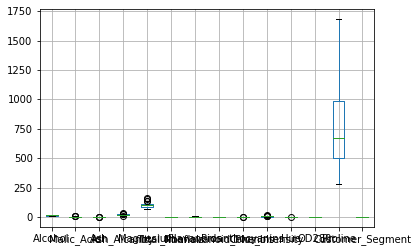

In [21]:
df.boxplot()
import seaborn as sns

In [14]:
# checking for null values
df.isnull().values.any()

False

In [18]:
# checking for duplicates
df.duplicated().sum()

0

In [20]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

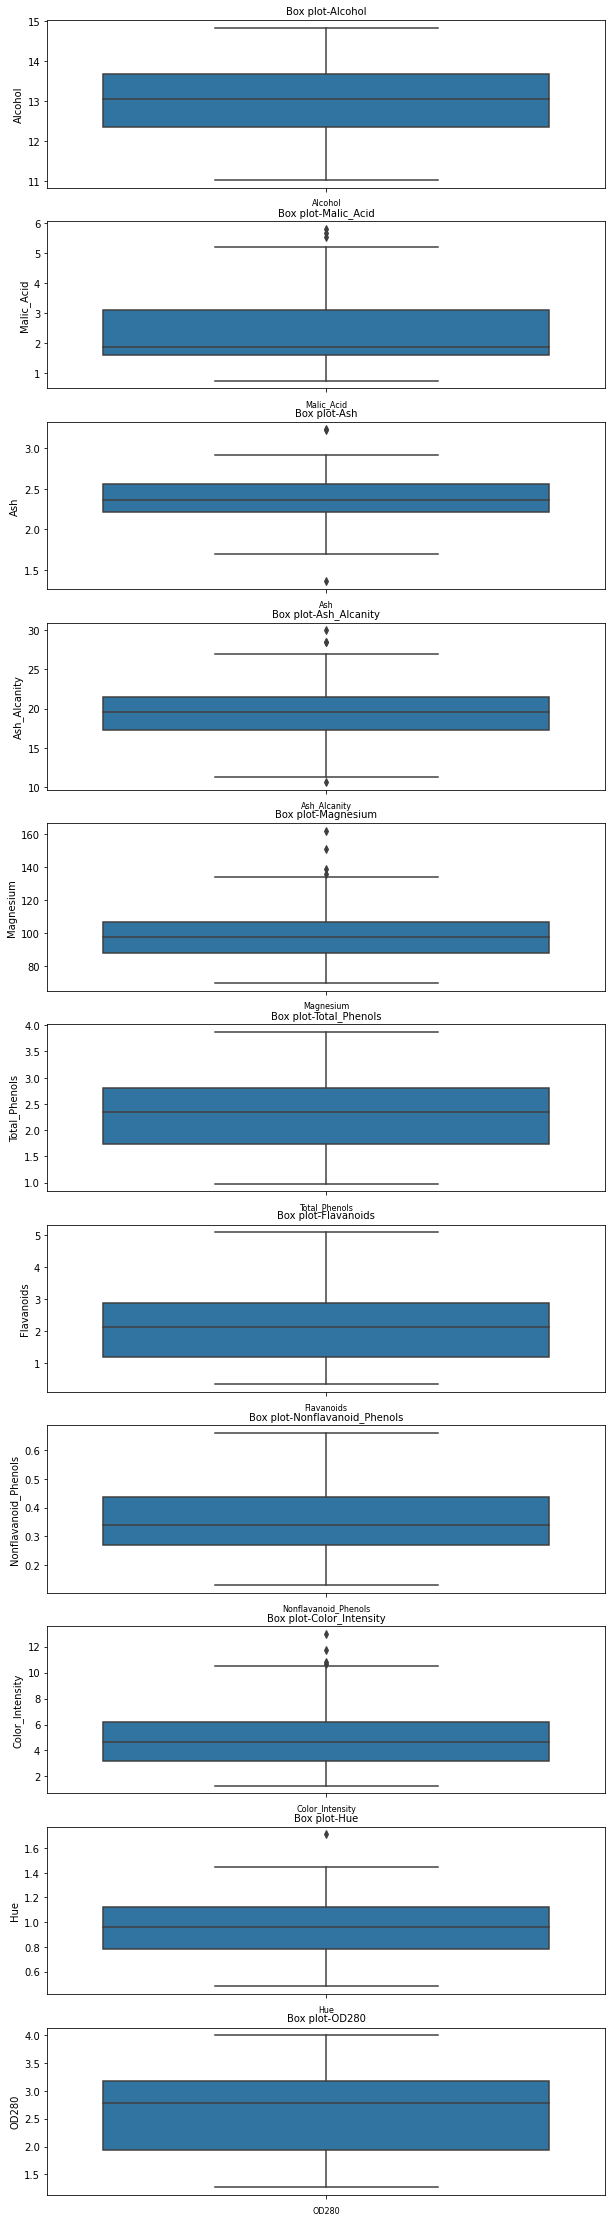

In [23]:
columns = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Color_Intensity','Hue','OD280',]

fig, ax = plt.subplots(len(columns), figsize = (10, 40))

for i, col_val in enumerate(columns):

  sns.boxplot(y= df[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [24]:
import pandas_profiling as pp

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

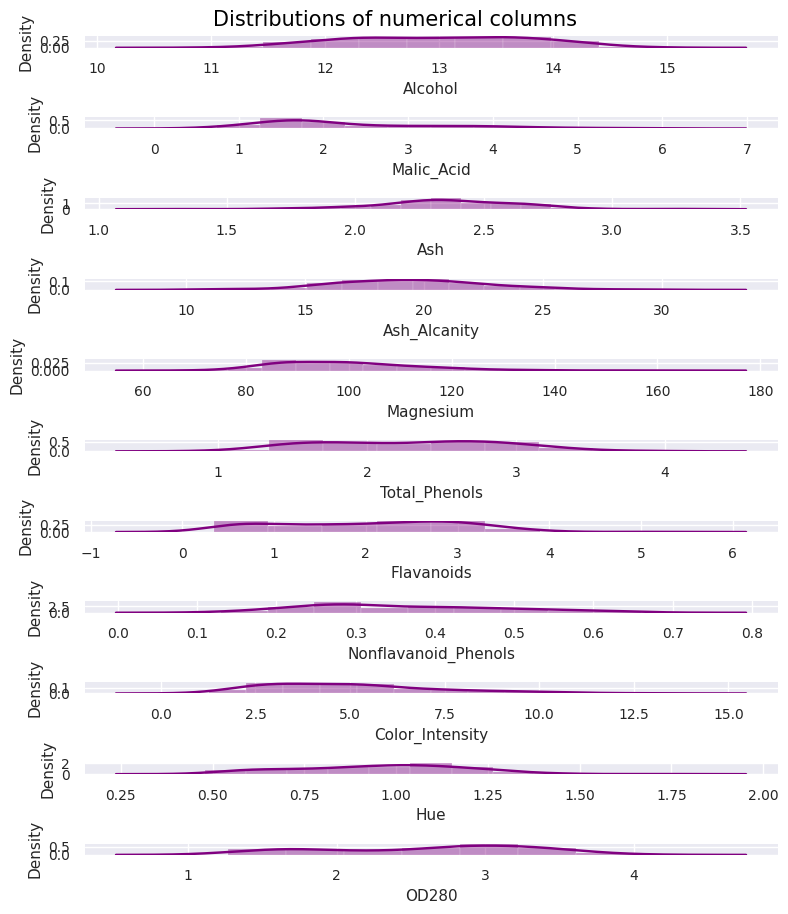

In [30]:
columns = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Color_Intensity','Hue','OD280',]

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (8, 9))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, columns):
  sns.distplot(df[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

In [33]:
# a functio to detect outliers
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(df):

    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)


    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [34]:
import numpy as np

# Function to Detection Outlier on one-dimentional datasets.
anomalies = []
def find_anomalies(df):
    # Set upper and lower limit to 3 standard deviation
    df_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3

    lower_limit = df_mean - anomaly_cut_off 
    upper_limit = df_mean + anomaly_cut_off

    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [35]:
import numpy as np
import pandas as pd
# Import dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
wine_scaled = preprocessing.scale(df)

In [38]:
# define PCA object
pca = PCA()
# fit the PCA model to our data and apply the dimensionality reduction
prin_comp = pca.fit_transform(wine_scaled)
# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)
pca_df["Customer_Segment"] = df["Customer_Segment"]

In [39]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Customer_Segment
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857,1
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402,1
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752,1
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903,1
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951,3
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277,3
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696,3
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823,3


Text(0, 0.5, 'Cumulative explained variance')

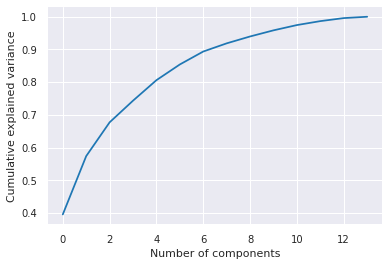

In [40]:
#cpaturing variance in the dataset
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [56]:
pca_85 = PCA(.85)
pca_85.fit_transform(wine_scaled)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
"% of variance explained by",
pca_85.n_components_,
"components.")

85.4 % of variance explained by 6 components.


##Visualizing 13D in 2D

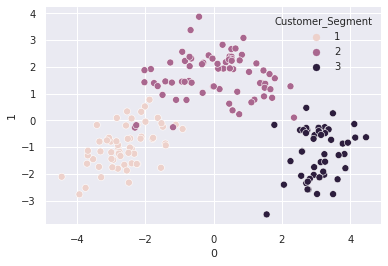

In [45]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
hue = 'Customer_Segment',
data=pca_df,
legend=True)
plt.show()

**Bi-Plot Analysis**

In [46]:
!pip install pca
from pca import pca
X_new = pd.DataFrame(data=load_wine().data, columns=load_wine().feature_names, index=load_wine().target)
wine_scaled_2 = preprocessing.scale(X_new)
wine_scaled_2

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=832278855ce84af3c82723166d7e818311a8bb42dcc52de66a948126a6c952ee
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [55]:

#columns = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Color_Intensity','Hue','OD280',]
#target=['	Customer_Segment']

In [47]:
columns_2 = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Color_Intensity','Hue','OD280',]

In [53]:
X_new = (df,df[columns_2], df['Customer_Segment'])

In [ ]:
#wine_scaled_2 = preprocessing.scale(X_new)
#wine_scaled_2

In [60]:
#X = data.drop[:,'fixed acidity':'alcohol']
#y = data['quality']

In [61]:
#df['Customer_Segment'].unique()